# Evaluating HR Separation/Retirement Predictions
# March 11,2016
### Based upon webserver predictions
### input models are:
* retirement_sf2.pkl
* separation_cf4.pkl


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [2]:
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\kesj\\Documents\\IPython Notebooks\\otherSFprojects\\HRsepara'

In [4]:
os.chdir('../../../projects/HRattrition/survival/')

In [5]:
current = pd.read_csv('current_v8.ssv',sep=';',dtype={'KEY':np.str,'EEO1CODE':np.str})
print("There are {0} current employees".format(len(current)))

There are 69475 current employees


### read in the predictions

In [6]:
sep_pred = pd.read_csv('separation_prediction.csv',
                       usecols=['KEY','sep_prob_0','sep_prob_1','sep_prob_2','sep_prob_3','sep_prob_4','sep_prob_5'])
ret_pred = pd.read_csv('retirement_prediction.csv',
                      usecols=['KEY','ret_prob_0','ret_prob_1','ret_prob_2','ret_prob_3','ret_prob_4','ret_prob_5'])

In [7]:
sep_pred.head()

,KEY,sep_prob_0,sep_prob_1,sep_prob_2,sep_prob_3,sep_prob_4,sep_prob_5
0,490903510940682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,850716555421574,0.000021,0.000031,0.000069,0.000175,0.000748,0.001301
2,213029456889736,0.000035,0.000064,0.000106,0.000711,0.001448,0.002075
3,765210492427093,0.627177,0.674326,0.719338,0.760545,0.801030,0.850097
4,297986222569824,0.035676,0.038690,0.041843,0.045026,0.048793,0.052697


In [8]:
def reduce_to_sums(prob, thresh=0.5):
    if str(type(prob)).split(".")[-1].startswith('DataFrame'):
        prob_cols = prob.columns.tolist()[1:]
        my_counts = (prob[prob_cols] >= thresh).astype(int).sum(axis=0)
        df_counts = pd.DataFrame(my_counts)
        df_counts.columns=['surv_pred']
        
    else: 
        my_counts = {}
        prob_cols = prob['surv'].columns.tolist()[1:]
        for item in prob.items:
            my_counts[item] = (prob[item][prob_cols] >= thresh).astype(int).sum(axis=0)

        df_counts = pd.DataFrame.from_dict(my_counts)
    
    return df_counts

In [9]:
sep_sums = reduce_to_sums(sep_pred)

In [10]:
sep_sums

,surv_pred
sep_prob_0,1613
sep_prob_1,1940
sep_prob_2,2307
sep_prob_3,2680
sep_prob_4,3051
sep_prob_5,3454


In [11]:
ret_sums = reduce_to_sums(ret_pred)
ret_sums

,surv_pred
ret_prob_0,1613
ret_prob_1,1940
ret_prob_2,2307
ret_prob_3,2680
ret_prob_4,3051
ret_prob_5,3454


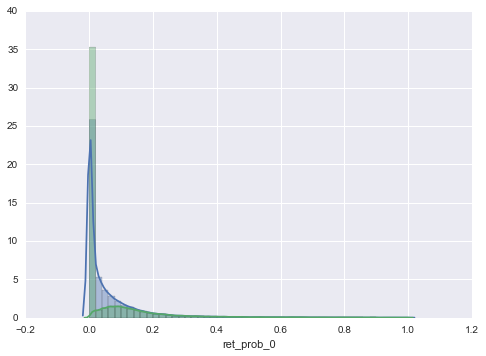

In [12]:
sns.distplot(sep_pred.sep_prob_0)
sns.distplot(ret_pred.ret_prob_0)

In [13]:
c_ret_prob = pd.read_csv('../reduced/current_retire_prob.csv')
c_sep_prob = pd.read_csv('../reduced/current_sep_prob.csv')

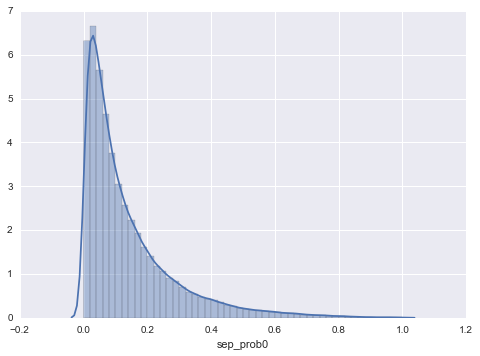

In [14]:
sns.distplot(c_sep_prob.sep_prob0)

In [15]:
reduce_to_sums(c_sep_prob)

,surv_pred
sep_prob0,2534
sep_prob1,4901
sep_prob2,7038
sep_prob3,9073
sep_prob4,11086
sep_prob5,12981


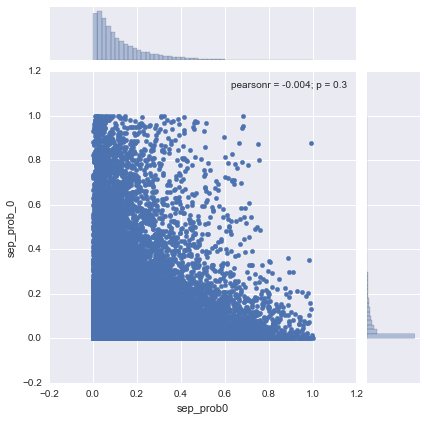

In [16]:
sns.jointplot(c_sep_prob.sep_prob0,sep_pred.sep_prob_0)

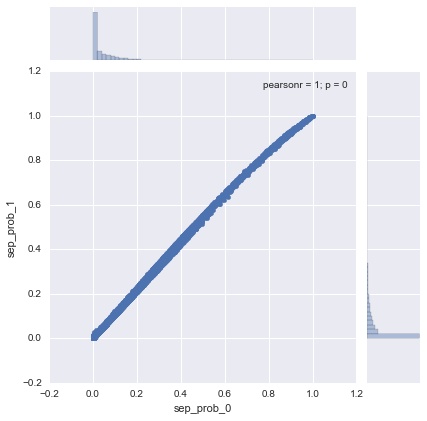

In [17]:
sns.jointplot(sep_pred.sep_prob_0,sep_pred.sep_prob_1)

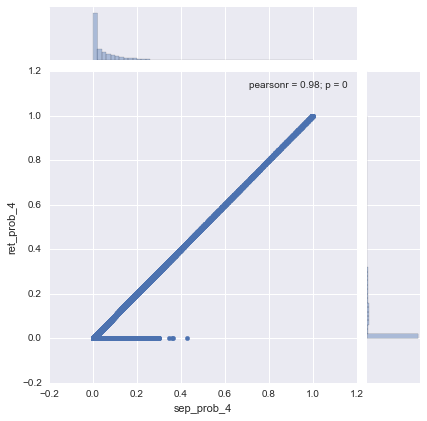

In [18]:
sns.jointplot(sep_pred.sep_prob_4,ret_pred.ret_prob_4)

In [19]:
c_sep_prob[c_sep_prob.columns[1:]].sum(axis=0)

sep_prob0     9686.144652
sep_prob1    12307.202178
sep_prob2    14324.847331
sep_prob3    16137.224547
sep_prob4    17830.190960
sep_prob5    19427.332452
dtype: float64

In [20]:
c_sep_prob.head()

,KEY,sep_prob0,sep_prob1,sep_prob2,sep_prob3,sep_prob4,sep_prob5
0,929965184037557,0.416907,0.433157,0.456523,0.469564,0.495995,0.516903
1,2396741883083,0.411617,0.430857,0.450175,0.466659,0.492508,0.505002
2,872454415016088,0.092980,0.098332,0.104625,0.109815,0.115951,0.122274
3,247046588569436,0.126733,0.136192,0.147030,0.159128,0.173263,0.188095
4,797202090638318,0.130791,0.142563,0.153719,0.163980,0.173378,0.181629


## Looking into how this got so bad
* issue 2: why they don't match the February 19,2016 document
* maybe it is the pipeline?

In [21]:
## current exists
current.head()

,ADDRCNT1,ADDRCNT10,ADDRCNT3,ADDRCNT5,ANNUAL_RT,Age_tdelta,Age_years,BIRTHDATE,BOX1,COMPANY,...,HAVE_DEP,DEP_COUNT,sep_status,mar_status,retired,terminated,hire_tstmp,term_tstmp,birth_tstmp,hire_age
0,1,1,1,1,16099.20,7788 days 00:00:00.000000000,21.322820,1993-09-05,0,1,...,0,0,0,1,0,0,2014-06-09,2015-01-01,1993-09-05,20.758811
1,0,1,1,1,31045.35,9808 days 00:00:00.000000000,26.853392,1988-02-24,2,1,...,0,0,0,1,0,0,2012-12-10,2015-01-01,1988-02-24,24.794486
2,0,1,1,1,39882.98,8665 days 00:00:00.000000000,23.723964,1991-04-12,2,1,...,0,0,0,1,0,0,2012-06-04,2015-01-01,1991-04-12,21.147594
3,0,0,0,0,44694.03,21052 days 00:00:00.000000000,57.638418,1957-05-13,2,5,...,1,1,0,0,0,0,1975-09-02,2015-01-01,1957-05-13,18.305646
4,0,0,0,0,78093.34,17164 days 00:00:00.000000000,46.993436,1968-01-04,2,5,...,1,3,0,0,0,0,1994-12-05,2015-01-01,1968-01-04,26.919102


In [22]:
import datetime as dt
my_date = dt.datetime(2015, 1, 1)  #allows the adjustment of these to a particular date

#MODEL_BASE_PATH = '/home/hrsepara/work/model/'
MODEL_BASE_PATH = 'C:\\Users\\kesj\\Documents\\projects\\HRattrition\\webserverTest\\models\\'
# ingest the uploaded data
cwd = os.getcwd()
#my_path = os.path.join(os.path.join(cwd, 'uploads'), '*.*')
#employee_df = parse_input_file(my_path)



# get the current date

if my_date is None:
    today_timestamp = pd.to_datetime(dt.datetime.today())
else:
    today_timestamp = pd.to_datetime(my_date)

In [23]:
today_timestamp

Timestamp('2015-01-01 00:00:00')

In [24]:
from glob import glob
import pickle

def get_surv_columns(surv_mdl):
    """
    Function to parse the given model and identify list of columns needed for input.
    input: surv_mdl = a survival model
    output: a list of columns required by this model.
    """
    event_col = surv_mdl.event_observed.name
    time_col = surv_mdl.durations.name
    model_cols = surv_mdl.hazards_.columns.tolist()
    cols_to_keep = [a for a in model_cols]
    #cols_to_keep.append(event_col)
    cols_to_keep.append(time_col)
    return cols_to_keep

def find_survival_models(MDL_BASE_PATH):  #,pkl_name,pred_years):
    surv_pkl_files = glob(MDL_BASE_PATH + '*.pkl')
    # n_files =len(surv_pkl_files)
    # if n_files <2:
    #     print("Sorry but less than 2 models were found. Recheck the path %s and try again" % MDL_BASE_PATH)
    # elif n_files > 2:
    #     print("the last model of each type will be used")
    prediction_cases = ['sep', 'ret']

    mdl_files = []
    mdl_files.append([a for a in surv_pkl_files if prediction_cases[0] in a][-1])
    mdl_files.append([a for a in surv_pkl_files if prediction_cases[1] in a][-1])
    """
    # load the models
    try:
        sep_mdl = pickle.load(open(mdl_file[0],'rb'))
    ret_mdl = pickle.load(open(mdl_file[1],'rb'))

    try:
        stored_mdl = pickle.load(open(mdl_name,'rb'))
        #stored_mdl = jl.load(mdl_name)

        sf_pred = stored_mdl.predict_survival_function(df)
        sf_pred.index.name='years'
        sf_pred.reset_index(inplace=True)
        pred_proba = get_survival_prediction(df,sf_pred,yr_vals=pred_years)

    except IOError:
        print "requested pickle file not found {0}, using default parameters.".format(mdl_name)
        # TODO create default predictions from simple Survival model for retirement.
        pred_proba = pd.DataFrame()

    return pred_proba
    """
    return mdl_files

# load the models

In [25]:
# check that there are models in that directory
mdl_files = find_survival_models(MODEL_BASE_PATH)
# load both models
sep_mdl = pickle.load(open(mdl_files[0], 'rb'))
ret_mdl = pickle.load(open(mdl_files[1], 'rb'))

# start with separation model
sep_cols = get_surv_columns(sep_mdl)
ret_cols = get_surv_columns(ret_mdl)
print(sep_cols,ret_cols)

(['Age_years', 'SAL1', 'MERIT1', 'PERF1', 'BOX1', 'SEX', 'HAVE_INS', 'HAVE_DEP', 'DEPTCNT1', 'EXTFUNC_CNT', 'FUNC_CNT', 'REMOTE', 'DIRECT_RPT_CNT', 'HUBIND', 'REH_CNT', 'JOB_FUNCTION_PSA', 'Tenure_years'], ['Age_years', 'SAL1', 'MERIT1', 'PERF1', 'BOX1', 'SEX', 'HAVE_INS', 'HAVE_DEP', 'Tenure_years'])


In [26]:
def prep_data(df, sep_cols, ret_cols, today_timestamp):
    """

    :param df:
    :param cols_to_keep:
    :param today_timestamp:
    :return: tmp_df, sep_cols, ret_cols
    """
    # identify columns that need processing
    input_cols = df.columns.tolist()

    cols_to_model = list(set(sep_cols).union(set(ret_cols)))
    cols_to_construct = list(set(cols_to_model) - set(input_cols))
    cols_to_keep = list(set(cols_to_model).union(set(input_cols)))

    # assume the time column(s) are in years
    time_cols = [col for col in cols_to_construct if col.endswith('years')]
    if len(time_cols):  # if length is zero this is skipped
        # 1. calculate Age and tenure from dates provided:
        #    * convert  HIRE_DT, BIRTHDATE and current_time to timestamps
        # 2. use these as years
        df[['hire_tstmp', 'birth_tstmp']] = df[['HIRE_DT', 'BIRTHDATE']] \
            .applymap(lambda x: pd.to_datetime(dt.datetime.strptime(x, '%d%b%Y')))
        df[['Age_years', 'Tenure_years']] = df[['birth_tstmp', 'hire_tstmp']] \
            .applymap(lambda x: calculate_years(x, today_timestamp))
        #hire_age_tdelta = employee_df['hire_tstmp']-employee_df['birth_tstmp']
        # convert to days, months, or years
        #employee_df['hire_age'] = hire_age_tdelta/np.timedelta64(1,'Y')
        for tcol in time_cols:
            cols_to_construct.remove(tcol)
            cols_to_keep.append(tcol)

    #tmp_df = df[cols_to_keep].copy() # just copy over the ones we know we want
    col_to_omit = []


    for col in cols_to_construct:
        # break into pieces to find the existing col in the dataframe
        pieces = col.split('_')
        dummy_cat = pieces[-1]
        main_cat = "_".join(piece for piece in pieces[:-1])
        #print(main_cat, dummy_cat)
        try:
            df[col] = df[main_cat].apply(lambda x: 1 if x == dummy_cat else 0)
        except KeyError:
            print("Desired column {0} not found; omitting it".format(col))
            col_to_omit.append(col)

    ## now I need to get my subset of columns for the particular model -- start with separation
    #if len(col_to_omit):
    sep_cols = list(set(sep_cols) - set(col_to_omit))
    ret_cols = list(set(ret_cols) - set(col_to_omit))

    new_cols_to_model = list(set(sep_cols).union(set(ret_cols)))

    tmp_df = df[new_cols_to_model].copy()  # create a subset of these columns
    #print(tmp_df.shape)
    ## now ensure that all are preprocessed correctly
    # Step 1 -- convert non numeric to numbers
    cols_to_convert = tmp_df.columns[tmp_df[new_cols_to_model].dtypes == "object"].tolist()

    #print(sep_cols, ret_cols,cols_to_convert)
    ## find non-numeric columns with missing values
    nn_mask = np.array(tmp_df[cols_to_convert].count() < len(tmp_df))
    nn_missing_cols = list(np.array(cols_to_convert)[nn_mask])

    #print(nn_missing_cols)
    for col in nn_missing_cols:
        if col == 'BOX1':
            tmp_df[col].fillna(0, inplace=True)  # currently being applied to BOX1
        else:
            tmp_df[col].fillna(-1, inplace=True)  # need to check how I did it in the model build stage

    ## convert these to ints
    # use simple logic:
    # a) N:0,Y:1
    # b) M:1, F:0
    # c) BOX1: BOX1':{'H':3,'S':2,'L':1},
    # d) COMP_FREQUENCY: 'A':1,'H':0
    specific_indicators = {'BOX1': {'H': 3, 'S': 2, 'L': 1}, 'COMP_FREQUENCY': {'A': 1, 'H': 0},
                           'SEX': {'M': 1, 'F': 0}}
    for key, value in specific_indicators.iteritems():
        if key in cols_to_convert:
            print("processing column {0} with {1}".format(key,value))
            #tmp_df[key] = tmp_df[key].replace(value).copy() #, inplace=True)  #.copy()
            tmp_df[key].replace(value,inplace=True)  #.copy()
            
    # generically convert N to 0 and Y to 1
    try:
        tmp_df[cols_to_convert] = tmp_df[cols_to_convert].replace({'N': 0, 'Y': 1}).copy()
    except TypeError:
        pass

    converted_types = tmp_df.dtypes[
        tmp_df.dtypes.apply(lambda x: str(x).startswith(('float', 'int', 'bool')))].index.tolist()
    ## check that all are now numeric
    if set(converted_types) != set(new_cols_to_model):
        print("ERROR you have not converted everthing")
        #exit(-1)

    ## look for missing/outliers
    n_mask = np.array(tmp_df.count() < len(tmp_df))
    n_missing_cols = list(np.array(new_cols_to_model)[n_mask])
    tmp_df[n_missing_cols] = tmp_df[n_missing_cols].fillna(0).copy()
    # apply specific transformations to match 2 percentile cutoff from training set
    # fix the dollar amounts
    # min_sal1 = 17621.76 #(based upon training set I have: 5 %tile cut off)
    min_sal1 = 12906.40  # based upon 2 percentile
    min_perf1 = 0.0
    min_merit1 = 0.0
    fix_min_outlier_col_dict = {'SAL1': min_sal1, 'MERIT1': min_merit1, 'PERF1': min_perf1}

    # replace these values
    for key, value in fix_min_outlier_col_dict.iteritems():
        if key in new_cols_to_model:
            idx_to_replace = tmp_df[tmp_df[key] < value].index
            tmp_df.loc[idx_to_replace, key] = value

    return tmp_df, sep_cols, ret_cols

In [27]:
df, sep_cols2, ret_cols2 = prep_data(current, sep_cols, ret_cols, today_timestamp)

processing column SEX with {'M': 1, 'F': 0}


In [28]:
df.head()

,REH_CNT,MERIT1,HAVE_INS,PERF1,SAL1,Tenure_years,REMOTE,Age_years,EXTFUNC_CNT,FUNC_CNT,SEX,HAVE_DEP,DIRECT_RPT_CNT,HUBIND,DEPTCNT1,JOB_FUNCTION_PSA,BOX1
0,0,0.00,0,0.00,16099.20,0.564009,0,21.322820,1827,3846,0,0,17,1,0,1,0
1,0,4208.72,1,1012.50,31045.35,2.058906,0,26.853392,156,725,1,0,14,1,1,1,2
2,1,1274.09,1,849.40,39882.98,2.576370,0,23.723964,4887,34937,1,0,8,0,0,0,2
3,0,790.27,1,965.88,44694.03,39.332772,0,57.638418,878,7769,0,1,19,0,1,1,2
4,0,1830.31,1,4270.73,78093.34,20.074334,0,46.993436,1074,34937,0,1,15,0,2,0,2


In [29]:
df, sep_cols2, ret_cols2 = prep_data(current, sep_cols, ret_cols, today_timestamp)

processing column SEX with {'M': 1, 'F': 0}


In [30]:
df.head()

,REH_CNT,MERIT1,HAVE_INS,PERF1,SAL1,Tenure_years,REMOTE,Age_years,EXTFUNC_CNT,FUNC_CNT,SEX,HAVE_DEP,DIRECT_RPT_CNT,HUBIND,DEPTCNT1,JOB_FUNCTION_PSA,BOX1
0,0,0.00,0,0.00,16099.20,0.564009,0,21.322820,1827,3846,0,0,17,1,0,1,0
1,0,4208.72,1,1012.50,31045.35,2.058906,0,26.853392,156,725,1,0,14,1,1,1,2
2,1,1274.09,1,849.40,39882.98,2.576370,0,23.723964,4887,34937,1,0,8,0,0,0,2
3,0,790.27,1,965.88,44694.03,39.332772,0,57.638418,878,7769,0,1,19,0,1,1,2
4,0,1830.31,1,4270.73,78093.34,20.074334,0,46.993436,1074,34937,0,1,15,0,2,0,2


### Looks like the prep_data function is bogus.
* try to fix this

In [31]:
# identify columns that need processing
input_cols = current.columns.tolist()

cols_to_model = list(set(sep_cols).union(set(ret_cols)))
cols_to_construct = list(set(cols_to_model) - set(input_cols))
cols_to_keep = list(set(cols_to_model).union(set(input_cols)))

# assume the time column(s) are in years
time_cols = [col for col in cols_to_construct if col.endswith('years')]
print(cols_to_keep)
print(cols_to_construct)

['FLSA_STATUS', 'BIRTHDATE', 'GRADE', 'CUR_LOC_MOS', 'JOB_FAMILY', 'RELOCATE_ALL_SFI', 'FULLPART10', 'FLOORCNT5', 'STD_HOURS', 'FLOORCNT1', 'FLOORCNT3', 'FULLPART5', 'JOBCNT10', 'FULLPART1', 'FTPTCNT3', 'EFUNCCNT1', 'EFUNCCNT3', 'sep_status', 'EFUNCCNT5', 'TOTAL_RPT_CNT', 'REMOTE', 'LOC_TYPE_DESCR_SFI', 'JOBCODE', 'SUPV_DIFF_LOC', 'SERVICE_DT', 'FUNC_ID_SFI', 'Age_tdelta', 'EMPL_CLASS', 'FLOR_SFI', 'LOCSTCNT10', 'SUPVCNT3', 'PERF1', 'SUPVCNT10', 'PARTFULL5', 'hire_tstmp', 'Age_years', 'COMPANY', 'FUNC_CNT', 'HUBIND', 'JOB_FUNCTION_PSA', 'RELO_STATE_CNT_SFI', 'PTFTCNT5', 'PTFTCNT1', 'KEY', 'PTFTCNT3', 'COMP_FREQUENCY', 'hire_age', 'HAVE_INS', 'FTE', 'HIRE_DT', 'TERMINATION_DT', 'LOCCNT3', 'DIRECT_RPT_CNT', 'LOCCNT1', 'REMOTE_SUPV', 'LOCCNT5', 'BOX1', 'EEO1CODE', 'birth_tstmp', 'retired', 'CUR_JOB_MOS', 'FUNCCNT5', 'EXT_FUNC_ID_SFI', 'FUNCCNT1', 'LOC_STATE', 'FUNCCNT3', 'JOB_FUNCTION', 'SUPVCNT1', 'terminated', 'SEX', 'ETHNIC_GROUP', 'DEP_COUNT', 'JOBCNT5', 'JOBCNT1', 'JOBCNT3', 'FUNCCNT

In [32]:
cols_to_model

['REH_CNT',
 'MERIT1',
 'HAVE_INS',
 'PERF1',
 'SAL1',
 'Tenure_years',
 'REMOTE',
 'Age_years',
 'EXTFUNC_CNT',
 'FUNC_CNT',
 'SEX',
 'HAVE_DEP',
 'DIRECT_RPT_CNT',
 'HUBIND',
 'DEPTCNT1',
 'JOB_FUNCTION_PSA',
 'BOX1']

In [33]:
new_cols_to_model = list(set(sep_cols).union(set(ret_cols)))

tmp_df = current[new_cols_to_model].copy()  # create a subset of these columns
#print(tmp_df.shape)
## now ensure that all are preprocessed correctly
# Step 1 -- convert non numeric to numbers
cols_to_convert = tmp_df.columns[tmp_df[new_cols_to_model].dtypes == "object"].tolist()

#print(sep_cols, ret_cols,cols_to_convert)
## find non-numeric columns with missing values
nn_mask = np.array(tmp_df[cols_to_convert].count() < len(tmp_df))
nn_missing_cols = list(np.array(cols_to_convert)[nn_mask])

In [34]:
tmp_df.isnull().any()

REH_CNT             False
MERIT1               True
HAVE_INS            False
PERF1                True
SAL1                False
Tenure_years        False
REMOTE              False
Age_years           False
EXTFUNC_CNT         False
FUNC_CNT            False
SEX                 False
HAVE_DEP            False
DIRECT_RPT_CNT      False
HUBIND              False
DEPTCNT1            False
JOB_FUNCTION_PSA    False
BOX1                False
dtype: bool

In [35]:
## look for missing/outliers
n_mask = np.array(tmp_df.count() < len(tmp_df))
n_missing_cols = list(np.array(new_cols_to_model)[n_mask])
n_missing_cols

['MERIT1', 'PERF1']

In [36]:
tmp_df[n_missing_cols] = tmp_df[n_missing_cols].fillna(0)

In [37]:
def forecast_survival_function(mdl, df, time_range=[0, 1, 2, 3, 4, 5], calc_ci=True, extrapolate=False):
    """
        :param self:
        :param df:

        :param time_range:
        :param calc_ci: flag to return the confidence intervals
        :return:
    """

    # time_col = self.durations.name

    col_names = ['t_' + np.str(tp) for tp in time_range]
    # calculate the predicted hazard
    #order = mdl.confidence_intervals_.columns.tolist()
    #duration_col = mdl.durations.name
    #order.append(duration_col)
    #df = df[order]
    my_partial_hazard = mdl.predict_partial_hazard(df)
    print(df.shape)
    # assign the specific timepoints and calculate the cumulative hazards at these points
    forecast_times = identify_forecast_timepoints(mdl, df, time_range)
    max_time = mdl.baseline_hazard_.index.max()
    print(max_time)
    if extrapolate:
        # do a linear extrapolation of the cumulative hazards and use this to get values beyond the known range
        p_haz, p_haz_cov = curve_fit(line, mdl.baseline_cumulative_hazard_.index,
                                     mdl.baseline_cumulative_hazard_.values.ravel())
        # force the points to match
        offset = mdl.baseline_cumulative_hazard_.values[-1][0] - line(mdl.baseline_cumulative_hazard_.index[-1],
                                                                      p_haz[0], p_haz[1])
        # apply to timepoints
        specific_cumulative_hazards = forecast_times.applymap(lambda x: return_desired_cumulative_hazards(mdl, x)
        if x <= max_time else offset + line(x, p_haz[0], p_haz[1]))
    else:  # this is the default case
        # replace those that exceed the max-time observed with the max observed time
        forecast_times[forecast_times > max_time] = max_time
        specific_cumulative_hazards = forecast_times.applymap(lambda x: return_desired_cumulative_hazards(x, mdl))

        # predict the survival function at these forecasted times
        pred_survival_fcn = pd.DataFrame(np.exp(-np.multiply(specific_cumulative_hazards.values,
                                                             my_partial_hazard.values)), index=df.index)

    if calc_ci:
        # calculate the predicted hazard
        try:
            partial_hazard_ci = mdl.predict_partial_hazard_ci(df)
        except AttributeError:
            #df_index = mdl._get_index(df)
            if isinstance(df, pd.DataFrame):
                order = mdl.hazards_.columns
                df = df[order]
            if mdl.normalize:
                df2 = ll.utils.normalize(df, mdl._norm_mean.values, mdl._norm_std.values)
            partial_hazard_ci = pd.DataFrame(np.exp(np.dot(df2, mdl.confidence_intervals_.T)), index=df.index.tolist())
            partial_hazard_ci['lowerbound'] = partial_hazard_ci.min(axis=1)
            partial_hazard_ci['upperbound'] = partial_hazard_ci.max(axis=1)
            partial_hazard_ci = partial_hazard_ci[['lowerbound', 'upperbound']]

        pred_lower_survival_ci = pd.DataFrame(np.exp(-np.multiply(specific_cumulative_hazards.values.T,
                                                                  partial_hazard_ci.values[:, 1])),
                                              columns=df.index).T
        pred_upper_survival_ci = pd.DataFrame(np.exp(-np.multiply(specific_cumulative_hazards.values.T,
                                                                  partial_hazard_ci.values[:, 0])),
                                              columns=df.index).T

        surv_prediction = pd.Panel(data={'surv': pred_survival_fcn, 'lbci': pred_lower_survival_ci,
                                         'ubci': pred_upper_survival_ci})
    else:
        surv_prediction = pd.Panel(data={'surv': pred_survival_fcn})

    surv_prediction.minor_axis = col_names

    return surv_prediction

In [38]:
## Forecast forward in 1 year intervals
def identify_forecast_timepoints(mdl, X, time_range):
    """
        :param X: a (n,d) covariate numpy array or DataFrame. If a numpy array, it is coerced into a DataFrame
        :param time_range: a list of times to calculate the survival for.
        :return: time_point_df a DataFrame of selected future times to create survival forecasts for.

        Construct a data frame that has the current time_col for each observation incremented by the values in the
        desired list (time_range)
    """
    time_col = mdl.durations.name
    column_names = ['time_point_' + np.str(tp) for tp in time_range]
    if isinstance(X, pd.DataFrame):
        my_index = X.index.tolist()
    else:
        my_index = np.arange(0, len(X))
        X = pd.DataFrame(X, columns=mdl.hazards_.columns)

    time_point_df = pd.DataFrame(columns=column_names, index=my_index)
    for idx in my_index:
        my_times = np.array([X.loc[idx, time_col] + tp for tp in time_range])
        time_point_df.ix[idx] = my_times

    return time_point_df


def line(x, a, b):
    return a * x + b

In [39]:
def return_desired_cumulative_hazards(t, mdl):
    """
    t: an event time that is used as the base line to forecast forward in time
    """
    maxtimepoint = mdl.baseline_hazard_.index.max()  # Now taken care of in the forecast
    if t > maxtimepoint:
        t = maxtimepoint  # just set to the max value.
    try:
        # spec_hazard = self.baseline_hazard_.ix[t].values
        c_haz = mdl.baseline_cumulative_hazard_.ix[t].values[0]

    except KeyError:
        # get the first after this point
        t_post = mdl.baseline_hazard_.ix[t:].index[0]
        # get the last before this point
        t_prior = mdl.baseline_hazard_.ix[:t].index[-1]
        # x = [t_prior, t_post]
        y = [mdl.baseline_cumulative_hazard_.ix[t_prior].values[0],
             mdl.baseline_cumulative_hazard_.ix[t_post].values[0]]
        # print(x, y)
        chaz_interp = interpolate.interp1d([t_prior, t_post], y)
        c_haz = chaz_interp(t)

    return c_haz

In [40]:
from scipy import interpolate
from scipy.optimize import curve_fit
import lifelines as ll

In [41]:
%%time
yr_range = np.arange(0, 6)
# pred_years = map(np.str,yr_range)
# apply the separation model
sep_surv_pred = forecast_survival_function(sep_mdl, df[sep_cols2], time_range=yr_range)

(69475, 17)
58.0408906411
Wall time: 27min 53s


In [42]:
sep_surv_pred

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 69475 (major_axis) x 6 (minor_axis)
Items axis: lbci to ubci
Major_axis axis: 0 to 69474
Minor_axis axis: t_0 to t_5

In [46]:
sep_surv_pred['surv'].head()

,t_0,t_1,t_2,t_3,t_4,t_5
0,0.490665,0.118927,0.029149,0.006714,0.001207,0.000185
1,0.719346,0.604101,0.499816,0.408155,0.320292,0.252039
2,0.768694,0.688586,0.606835,0.528077,0.453458,0.385592
3,0.645614,0.633918,0.611046,0.592715,0.577776,0.534007
4,0.962339,0.959068,0.955707,0.952158,0.948308,0.943829


In [48]:

def convert_surv_to_prob(surv_pred, pred_type, keyed_df):
    prob = {}

    for item in surv_pred.items:
        if item == 'lbci':
            prob['ubcip'] = pd.concat([keyed_df, 1 - surv_pred[item]], axis=1)
            prob['ubcip'].fillna(0, inplace=True)
        elif item == 'ubci':
            prob['lbcip'] = pd.concat([keyed_df, 1 - surv_pred[item]], axis=1)
            prob['lbcip'].fillna(0, inplace=True)
        else:
            prob['surv'] = pd.concat([keyed_df, 1 - surv_pred[item]], axis=1)
            prob['surv'].fillna(0, inplace=True)
            
            

    # now check that lengths match
    # if len(surv_pred['surv'])!=len(keyed_df):
    #    for item in surv_pred.items:
    #        prob[item]
    #timepoint_cols = surv_pred.minor_axis.tolist()
    if pred_type == 'ret':
        rep_string = 'ret_prob'
    elif pred_type == 'sep':
        rep_string = 'sep_prob'

    probabilities = pd.Panel.from_dict(prob)
    probabilities.minor_axis = [a.replace('t', rep_string) for a in probabilities.minor_axis.tolist()]

    return probabilities


In [50]:
keyed_df = pd.DataFrame(current['KEY'])
sep_prob = convert_surv_to_prob(sep_surv_pred,'sep',keyed_df)

In [51]:
sep_prob['surv'].head()

,KEY,sep_prob_0,sep_prob_1,sep_prob_2,sep_prob_3,sep_prob_4,sep_prob_5
0,490903510940682,0.509335,0.881073,0.970851,0.993286,0.998793,0.999815
1,850716555421574,0.280654,0.395899,0.500184,0.591845,0.679708,0.747961
2,213029456889736,0.231306,0.311414,0.393165,0.471923,0.546542,0.614408
3,765210492427093,0.354386,0.366082,0.388954,0.407285,0.422224,0.465993
4,297986222569824,0.0376609,0.0409322,0.0442935,0.0478425,0.0516923,0.056171


In [99]:
sep_counts = reduce_to_sums(sep_prob)

In [100]:
sep_counts

,lbcip,surv,ubcip
sep_prob_0,2303,2549,2857
sep_prob_1,4438,4940,5424
sep_prob_2,6535,7068,7630
sep_prob_3,8503,9097,9676
sep_prob_4,10514,11103,11696
sep_prob_5,12445,13007,13617


## now for retirement

In [57]:
%%time
# first omit those who are under min_age
min_age = 50.0
ret_pred_df = df[df['Age_years'] >= min_age].copy()
ret_surv_pred = forecast_survival_function(ret_mdl, ret_pred_df[ret_cols], time_range=yr_range)
#, calc_ci=True,  extrapolate=False)

(23502, 9)
61.5810044012
Wall time: 4min 4s


In [58]:
ret_prob = convert_surv_to_prob(ret_surv_pred, 'ret', keyed_df)

In [61]:
ret_counts = reduce_to_sums(ret_prob, 0.5)
print(ret_counts)

            lbcip  surv  ubcip
ret_prob_0   1509  1618   1760
ret_prob_1   1794  1945   2104
ret_prob_2   2144  2313   2495
ret_prob_3   2499  2687   2868
ret_prob_4   2882  3058   3247
ret_prob_5   3256  3461   3668


In [62]:
%pwd

u'C:\\Users\\kesj\\Documents\\projects\\HRattrition\\survival'

In [101]:
ret_mdl.print_summary()

n=34767, number of events=11905

                coef  exp(coef)  se(coef)          z          p  lower 0.95  upper 0.95     
Age_years  3.388e-01  1.403e+00 1.010e-02  3.354e+01 1.192e-246   3.190e-01   3.586e-01  ***
SAL1      -2.439e-01  7.836e-01 1.313e-02 -1.858e+01  4.794e-77  -2.697e-01  -2.182e-01  ***
MERIT1    -2.373e-01  7.888e-01 1.416e-02 -1.675e+01  5.614e-63  -2.650e-01  -2.095e-01  ***
PERF1     -1.240e-01  8.834e-01 1.373e-02 -9.032e+00  1.686e-19  -1.509e-01  -9.708e-02  ***
BOX1      -1.031e-02  9.897e-01 1.254e-02 -8.222e-01  4.110e-01  -3.488e-02   1.427e-02     
SEX        1.697e-01  1.185e+00 1.129e-02  1.503e+01  4.522e-51   1.475e-01   1.918e-01  ***
HAVE_INS  -1.610e-01  8.513e-01 1.126e-02 -1.430e+01  2.206e-46  -1.830e-01  -1.389e-01  ***
HAVE_DEP   4.226e-03  1.004e+00 1.099e-02  3.844e-01  7.007e-01  -1.732e-02   2.578e-02     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.723


In [102]:
ret_mdl.hazards_

,Age_years,SAL1,MERIT1,PERF1,BOX1,SEX,HAVE_INS,HAVE_DEP
coef,0.338839,-0.243914,-0.237271,-0.123995,-0.010308,0.169653,-0.160961,0.004226


In [98]:
reduce_to_sums(sep_prob['surv']).iloc[1:].diff()

,surv_pred
sep_prob_1,NaN
sep_prob_2,2128
sep_prob_3,2029
sep_prob_4,2006
sep_prob_5,1904


In [67]:
sep_excel_file ='sep_prediction.xlsx'
writer = pd.ExcelWriter(sep_excel_file, engine='xlsxwriter')
sep_prob['surv'].to_excel(writer,'prediction',index=False)
sep_prob['lbcip'].to_excel(writer,'lbci',index=False)
sep_prob['ubcip'].to_excel(writer,'ubci',index=False)

writer.save()


In [70]:
ret_excel_file ='ret_prediction.xlsx'
writer = pd.ExcelWriter(ret_excel_file,engine='xlsxwriter')
ret_prob['surv'].to_excel(writer,'prediction',index=False)
ret_prob['lbcip'].to_excel(writer,'lbci',index=False)
ret_prob['ubcip'].to_excel(writer,sheet_name='ubci',index=False)
writer.save()


In [71]:
[c for c in current.columns.tolist() if 'JOB' in c]

['CUR_JOB_MOS',
 'JOBCNT1',
 'JOBCNT10',
 'JOBCNT3',
 'JOBCNT5',
 'JOBCODE',
 'JOB_FAMILY',
 'JOB_FUNCTION',
 'JOB_FUNCTION_PSA']

In [73]:
current[['KEY','Age_years','Tenure_years','JOBCODE','EXT_FUNC_ID_SFI']].to_csv('current_empl_features.csv',index=False)

In [77]:
## count how many examples in the current dataframe
[(v,len(current[current.EXT_FUNC_ID_SFI==k])) for k,v in extFuncDict.iteritems()]

[('SFPP', 783),
 ('State Farm Bank', 1507),
 ('CCC Service', 1823),
 ('Enterprise Auto Express', 2587),
 ('Enterprise ILR', 2462),
 ('Life Health Response Center', 376),
 ('CCC Sales', 1636)]

In [74]:
#interesting_extended_functions = [892,71, 816, 909,910,517,835]
extFuncDict ={}
extFuncDict[892]='CCC Sales'
extFuncDict[71]='CCC Service'
extFuncDict[816]='Life Health Response Center'
#(00816)
extFuncDict[909]='Enterprise Auto Express'
extFuncDict[910]='Enterprise ILR' 
extFuncDict[517]='State Farm Bank'
extFuncDict[835]='SFPP'
interesting_extended_functions = extFuncDict.keys()
extFuncDict

{71: 'CCC Service',
 517: 'State Farm Bank',
 816: 'Life Health Response Center',
 835: 'SFPP',
 892: 'CCC Sales',
 909: 'Enterprise Auto Express',
 910: 'Enterprise ILR'}

In [108]:
ext_val = 835
print (extFuncDict[ext_val])
print (len(sep_prob['surv'][current.EXT_FUNC_ID_SFI==ext_val]))
#(sep_df[sep_df.EXT_FUNC_ID_SFI==ext_val][sep_pred_cols]+f1_offsets).values.astype(int).sum(axis=0)

SFPP
783


In [137]:
ext_val = 909

In [138]:
panel_frames = ['surv','lbcip','ubcip']
print ("The current group for {0} has {1} members".format(extFuncDict[ext_val],len(sep_prob['surv'][current.EXT_FUNC_ID_SFI==ext_val])))

for panel in panel_frames:
    print("_______ \n {0}".format(panel))
    print (reduce_to_sums(sep_prob[panel][current.EXT_FUNC_ID_SFI==ext_val]))

The current group for Enterprise Auto Express has 2587 members
_______ 
 surv
            surv_pred
sep_prob_0         12
sep_prob_1         63
sep_prob_2        185
sep_prob_3        337
sep_prob_4        508
sep_prob_5        675
_______ 
 lbcip
            surv_pred
sep_prob_0         11
sep_prob_1         51
sep_prob_2        154
sep_prob_3        295
sep_prob_4        463
sep_prob_5        645
_______ 
 ubcip
            surv_pred
sep_prob_0         13
sep_prob_1         73
sep_prob_2        219
sep_prob_3        367
sep_prob_4        539
sep_prob_5        697


In [144]:
sp_cols = sep_prob[panel].columns.tolist()[1:]

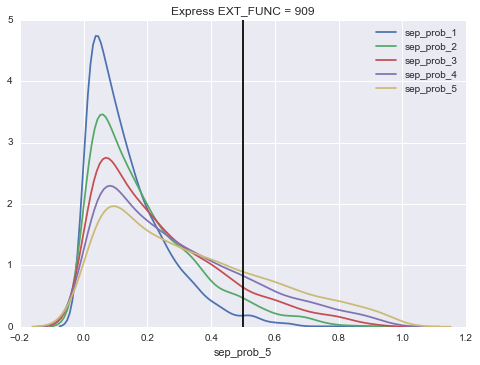

In [152]:
#g = sns.FacetGrid(sep_prob[panel][current.EXT_FUNC_ID_SFI==ext_val],col=)
#g = sns.pairplot(sep_prob[panel][current.EXT_FUNC_ID_SFI==ext_val],vars=sp_cols,diag_kind = "kde")
                 #distplot(sep_prob[panel]['sep_prob_1'][current.EXT_FUNC_ID_SFI==ext_val])
ext_val = 909
for col in sp_cols[1:]:
    sns.distplot(sep_prob[panel_frames[1]][current.EXT_FUNC_ID_SFI==ext_val][col],hist=False,label=col)
plt.axvline(0.5,c='k')
plt.legend()
plt.title('Express EXT_FUNC = 909')

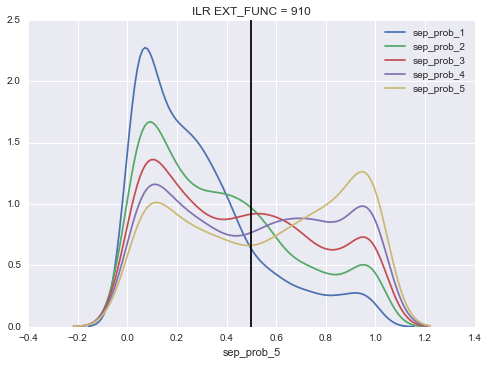

In [153]:
ext_val = 910
for col in sp_cols[1:]:
    sns.distplot(sep_prob[panel_frames[1]][current.EXT_FUNC_ID_SFI==ext_val][col],hist=False,label=col)
plt.axvline(0.5,c='k')
plt.legend()
plt.title('ILR EXT_FUNC = 910')

In [154]:
panel_frames

['surv', 'lbcip', 'ubcip']

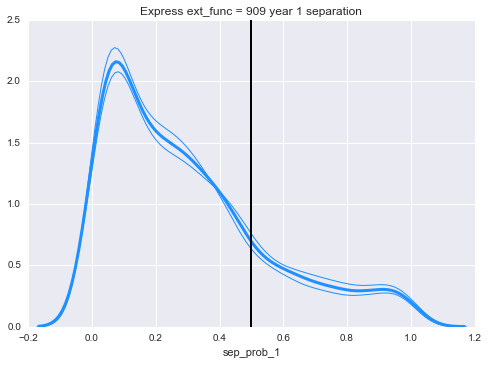

In [159]:
for panel in panel_frames:
    my_lw = 1
    if panel == 'surv':
        my_lw = 3
    sns.distplot(sep_prob[panel][current.EXT_FUNC_ID_SFI==ext_val][sp_cols[1]],hist=False,color='dodgerblue',
                 kde_kws={"lw": my_lw})
plt.axvline(0.5,color='k',lw=2)
plt.title('Express ext_func = 909 year 1 separation')

In [141]:
for panel in panel_frames:
    print("_______ full sum \n {0}".format(panel))
    print (sep_prob[panel][sep_prob[panel].columns.tolist()[1:]][current.EXT_FUNC_ID_SFI==ext_val].sum())

_______ full sum 
 surv
sep_prob_0    230.166715
sep_prob_1    381.306152
sep_prob_2    516.120238
sep_prob_3    642.197163
sep_prob_4    760.723786
sep_prob_5    875.421992
dtype: float64
_______ full sum 
 lbcip
sep_prob_0    219.533928
sep_prob_1    364.693991
sep_prob_2    495.677142
sep_prob_3    619.237555
sep_prob_4    736.211626
sep_prob_5    850.056960
dtype: float64
_______ full sum 
 ubcip
sep_prob_0    241.504548
sep_prob_1    398.763781
sep_prob_2    537.316206
sep_prob_3    665.740374
sep_prob_4    785.641465
sep_prob_5    901.036180
dtype: float64


## repeat for jobcode

In [121]:
jc_val = [6200]
print ([jobCodeDict[jv] for jv in jc_val])
print (len(sep_prob['surv'][current.JOBCODE.isin(jc_val)]))


['CCC Service Rep']
1472


In [75]:
jobCodeDict = {}
jobCodeDict[6200]= 'CCC Service Rep'
jobCodeDict[1876]= 'CCC Sales Rep'
jobCodeDict[1009]='CLaim Associate-ILR'
jobCodeDict[986]='CLaim Team Manager-ILR'
jobCodeDict[983]='Claim Associate-Express'
jobCodeDict[984]='Claim Associate-Express'
jobCodeDict[2638]='Life Customer Service Asst'
jobCodeDict[2639]='Life Customer Service Asst'
jobCodeDict[2641]='Life Customer Service Asst'
jobCodeDict[4105]= 'SFPP Account Rep'
jobCodeDict[851]= 'Bank Customer Service Rep'
jobCodeDict[852]= 'Bank Customer Service Rep'
jobCodeDict[853]= 'Bank Customer Service Rep'
interesting_jobcodes =  jobCodeDict.keys()
jobCodeDict

{851: 'Bank Customer Service Rep',
 852: 'Bank Customer Service Rep',
 853: 'Bank Customer Service Rep',
 983: 'Claim Associate-Express',
 984: 'Claim Associate-Express',
 986: 'CLaim Team Manager-ILR',
 1009: 'CLaim Associate-ILR',
 1876: 'CCC Sales Rep',
 2638: 'Life Customer Service Asst',
 2639: 'Life Customer Service Asst',
 2641: 'Life Customer Service Asst',
 4105: 'SFPP Account Rep',
 6200: 'CCC Service Rep'}

In [135]:
#jc_val=[2638, 2639, 2641]#983,984]
jc_val = [851,852,853]

In [136]:
#panel_frames = ['surv','lbcip','ubcip']
print ("The current group for {0} has {1} members".format(jobCodeDict[jc_val[0]],len(sep_prob['surv'][current.JOBCODE.isin(jc_val)])))

for panel in panel_frames:
    print("_______ \n {0}".format(panel))
    print (reduce_to_sums(sep_prob[panel][current.JOBCODE.isin(jc_val)]))

The current group for Bank Customer Service Rep has 188 members
_______ 
 surv
            surv_pred
sep_prob_0         10
sep_prob_1         32
sep_prob_2         62
sep_prob_3         84
sep_prob_4        108
sep_prob_5        112
_______ 
 lbcip
            surv_pred
sep_prob_0         10
sep_prob_1         27
sep_prob_2         54
sep_prob_3         77
sep_prob_4        103
sep_prob_5        112
_______ 
 ubcip
            surv_pred
sep_prob_0         14
sep_prob_1         36
sep_prob_2         69
sep_prob_3         99
sep_prob_4        110
sep_prob_5        117


In [87]:
[col for col in current.columns.tolist() if 'LOC' in col]

['CUR_LOC_MOS',
 'LOCCNT1',
 'LOCCNT10',
 'LOCCNT3',
 'LOCCNT5',
 'LOCSTCNT1',
 'LOCSTCNT10',
 'LOCSTCNT3',
 'LOCSTCNT5',
 'LOC_STATE',
 'LOC_TYPE_DESCR_SFI',
 'RELOCATE_ALL_SFI',
 'SUPV_DIFF_LOC']

In [88]:
current.HUBIND.value_counts()

N    36844
Y    32631
Name: HUBIND, dtype: int64

In [89]:
pd.crosstab(current.HUBIND, current.LOC_STATE)

LOC_STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,XX
HUBIND,,,,,,,,,,,,,,,,,,,,,
N,37,1238,166,235,3459,1669,40,10,67,3574,...,1850,2929,106,1828,6,287,192,125,18,1
Y,0,0,0,4467,0,0,0,0,0,0,...,0,6130,0,0,0,2176,0,0,0,0


In [90]:
current[current.HUBIND=='Y'].LOC_STATE.value_counts()

IL    14040
TX     6130
GA     5818
AZ     4467
WA     2176
Name: LOC_STATE, dtype: int64

In [91]:
sep_mdl.print_summary()

n=76368, number of events=31927

                       coef  exp(coef)  se(coef)          z          p  lower 0.95  upper 0.95     
Age_years        -9.386e-01  3.912e-01 1.023e-02 -9.175e+01  0.000e+00  -9.587e-01  -9.185e-01  ***
SAL1             -1.115e+00  3.278e-01 1.479e-02 -7.539e+01  0.000e+00  -1.144e+00  -1.086e+00  ***
MERIT1            2.742e-01  1.315e+00 6.343e-03  4.323e+01  0.000e+00   2.618e-01   2.866e-01  ***
PERF1            -1.016e-01  9.034e-01 1.240e-02 -8.195e+00  2.514e-16  -1.259e-01  -7.730e-02  ***
BOX1             -4.839e-01  6.164e-01 6.824e-03 -7.090e+01  0.000e+00  -4.972e-01  -4.705e-01  ***
SEX               1.643e-01  1.179e+00 6.098e-03  2.695e+01 5.826e-160   1.524e-01   1.763e-01  ***
HAVE_INS         -3.066e-01  7.359e-01 9.072e-03 -3.380e+01 1.975e-250  -3.244e-01  -2.888e-01  ***
HAVE_DEP         -2.326e-01  7.925e-01 1.147e-02 -2.027e+01  2.258e-91  -2.550e-01  -2.101e-01  ***
DEPTCNT1         -3.471e-01  7.068e-01 9.569e-03 -3.627e+01 4.495e-

In [94]:
np.exp(0)

1.0

In [95]:
current.EXTFUNC_CNT.value_counts()

6133    6088
4887    4858
2592    2587
2470    2462
2235    2221
1827    1823
1756    1729
1637    1636
1524    1507
1372    1352
1340    1332
1269    1268
1200    1198
1154    1144
1134    1127
1107    1094
1074    1070
952      946
458      915
878      876
867      865
855      836
839      832
789      783
781      780
763      761
368      732
709      703
679      661
644      639
        ... 
15        59
58        58
27        57
57        57
55        55
18        53
53        53
50        50
24        47
45        45
65        45
47        45
36        36
34        34
46        27
13        26
8         24
23        23
6         21
22        18
28        18
17        17
35        16
14        14
11        11
2          8
7          6
4          6
3          4
1          4
Name: EXTFUNC_CNT, dtype: int64